# Homework 4

## Problem 1
## Part a

In [299]:
import pandas as pd
import numpy as np

In [300]:
df = pd.read_csv('churn.txt')
print("Shape of 'churn.txt' data:", df.shape) # Have an overlook on the shape of the data.

Shape of 'churn.txt' data: (3333, 21)


In [301]:
df.drop(['State','Area Code','Phone','VMail Plan', 
         'Day Charge','Eve Calls','Eve Charge', 
         'Night Calls','Night Charge','Intl Charge'], axis=1, inplace=True)

df.head(3)

,Account Length,Int'l Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Night Mins,Intl Mins,Intl Calls,CustServ Calls,Churn?
0,128,no,25,265.1,110,197.4,244.7,10.0,3,1,False.
1,107,no,26,161.6,123,195.5,254.4,13.7,3,1,False.
2,137,no,0,243.4,114,121.2,162.6,12.2,5,0,False.


In [302]:
# MinMaxScaler Normalization.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
df[['Account Length','VMail Message', 
   'Day Mins','Day Calls',
   'Eve Mins','Night Mins',
   'Intl Mins','Intl Calls',
   'CustServ Calls']] = scaler.fit_transform(df[['Account Length','VMail Message', 
                                               'Day Mins','Day Calls',
                                               'Eve Mins','Night Mins',
                                               'Intl Mins','Intl Calls',
                                               'CustServ Calls']])

In [303]:
# OneHot Encoder

import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['Int\'l Plan', 'Churn?'])
df = encoder.fit_transform(df)


df.rename(columns={'Int\'l Plan_1': 'Int\'l Plan no', 
                   'Int\'l Plan_2': 'Int\'l Plan yes'}, inplace=True)
df.rename(columns={'Churn?_1': 'Churn? False', 
                   'Churn?_2': 'Churn? True'}, inplace=True)

/Users/liubohan/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [304]:
# Have a look at the processed dataset.
df.head(2)

,Account Length,Int'l Plan no,Int'l Plan yes,VMail Message,Day Mins,Day Calls,Eve Mins,Night Mins,Intl Mins,Intl Calls,CustServ Calls,Churn? False,Churn? True
0,0.049587,1,0,-0.019608,0.511403,0.333333,0.085510,0.191501,0.00,-0.7,-0.777778,1,0
1,-0.123967,1,0,0.019608,-0.078677,0.490909,0.075062,0.243679,0.37,-0.7,-0.777778,1,0


In [305]:
# Split dataset without ramdom

from sklearn.model_selection import train_test_split

X = df[['Account Length','Int\'l Plan no','Int\'l Plan yes','VMail Message',
        'Day Mins','Day Calls','Eve Mins','Night Mins','Intl Mins','Intl Calls',
        'CustServ Calls']]
#Y = df[['Churn? False','Churn? True']]
Y = df['Churn? True']

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [306]:
# Define the model
# For layers; four nodes for each hidden layer; single node in output node
# Sigmoid used for all activation functions

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.random.set_seed(1)

def create_model(hidden_layer1, hidden_layer2):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_layer1, input_dim=x_train.shape[1], activation='sigmoid'))
    model.add(layers.Dense(hidden_layer2,  activation='sigmoid'))
    model.add(layers.Dense(1,  activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy']) 
    return model

In [307]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model_1a = KerasClassifier(build_fn=create_model)

In [308]:
param_grid = {'hidden_layer1':range(2,5), 'hidden_layer2':range(2,5)}
grid = GridSearchCV(estimator=model_1a, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

73/73 [==============================] - 0s 805us/step - loss: 0.2425 - accuracy: 0.6756
Best: 0.855115 using {'hidden_layer1': 3, 'hidden_layer2': 3}


In [309]:
# The grid search suggest to use 3 nodes in hidden_layer1 and 3 nodes in hidden_layer2.
grid_model = create_model(3, 3)

In [316]:
# layer weights from the model
print("Weights:")
for layer in grid_model.layers:
    weights = layer.get_weights()
    print(weights)

Weights:
[array([[-4.9543452e-01, -4.1796389e-01, -1.5357959e-01],
       [-2.3983717e-03, -4.7105569e-01, -1.8513203e-04],
       [ 6.2265611e-01, -4.0984356e-01, -6.1909300e-01],
       [-1.3899910e-01,  3.9081883e-01,  3.9925027e-01],
       [-4.4734547e-01,  5.7371473e-01, -3.7463766e-01],
       [ 5.4620862e-01,  2.3717225e-01,  2.5976646e-01],
       [ 3.0386150e-01, -2.8679883e-01,  3.7658286e-01],
       [-3.4311667e-01,  6.2150252e-01, -1.5988266e-01],
       [-8.8559389e-03, -5.1289415e-01, -3.6430442e-01],
       [ 3.4421581e-01,  4.8706305e-01,  6.3773644e-01],
       [-2.5257984e-01,  6.7753017e-02, -3.1184056e-01]], dtype=float32), array([0., 0., 0.], dtype=float32)]
[array([[-0.62432337, -0.9864683 ,  0.34454942],
       [-0.01529169, -0.6658089 ,  0.92712903],
       [ 0.5071087 , -0.9483743 ,  0.06502509]], dtype=float32), array([0., 0., 0.], dtype=float32)]
[array([[-0.862174  ],
       [ 0.53109634],
       [ 0.5487397 ]], dtype=float32), array([0.], dtype=float32)]


In [14]:
# layer loss from the model
x_array = np.asarray(x_test)
y_array = np.asarray(y_test)

score = grid_model.evaluate(x_array, y_array)
print("Loss:", score[0])

32/32 [==============================] - 0s 747us/step - loss: 0.2622 - accuracy: 0.1482
Loss: 0.26214495301246643


## Problem 1
## Part b 

In [286]:
# Setup new NN used for initializing weights.
model_1b = keras.Sequential()
model_1b.add(layers.Dense(3, input_dim=x_train.shape[1], activation='sigmoid'))
model_1b.add(layers.Dense(3,  activation='sigmoid'))
model_1b.add(layers.Dense(1,  activation='sigmoid'))

In [287]:
w1 = np.zeros((11, 3)) # eleven input neurons for three neurons at the hidden layer1
b1 = np.zeros((3,))    # one bias neuron for three neurons in the hidden layer1

w2 = np.zeros((3, 3))  # three hidden1 neurons for three hidden2 neurons
b2 = np.zeros((3,))    # one bias for three hidden2 neuron

w3 = np.zeros((3, 1))  # three hidden2 neurons for one output neuron
b3 = np.zeros((1,))    # one bias for one output neuron

In [288]:
w1[:,:] = 0 # the weights for the all hidden1 neuron are all 0
b1[:] = 0   # bias for the all hidden1 neuron are all 0

w2[:, :] = 1 # weight for hidden1 hidden2 nodes are 1;
b2[:] = 1 # bias for all hidden2 nodes are 1

w3[:, :] = 1 # weight for hidden2 output is 1.
b3[:] = 1 # bias for output node is 1.


In [289]:
model_1b.set_weights([w1, b1, w2, b2, w3, b3])
model_1b.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [317]:
# N3 output before back-propagation:
pred = model_1b.predict(x_test)
print(pred[0])

[0.9774865]


In [292]:
class FitCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        weights.append(self.model.layers[2].get_weights())
        
weights = []

In [293]:
x_array = np.asarray(x_train[0:1])
y_array = np.asarray(y_train[0:1])

result = model_1b.fit(x_array, y_array, epochs=1, batch_size=64, verbose=0, callbacks=[FitCallback()])

In [295]:
# back-propagation form output to hidden layer 2:
w_2z = []
w_2z.append(model_1b.layers[2].get_weights())
print(w_2z)

[[array([[0.999603],
       [0.999603],
       [0.999603]], dtype=float32), array([0.9995704], dtype=float32)]]


In [296]:
# back-propagation form hidden layer 2 to hidden layer 1:
w_12 = []
w_12.append(model_1b.layers[1].get_weights())
print(w_12)

[[array([[0.9999849, 0.9999849, 0.9999849],
       [0.9999849, 0.9999849, 0.9999849],
       [0.9999849, 0.9999849, 0.9999849]], dtype=float32), array([0.9999699, 0.9999699, 0.9999699], dtype=float32)]]


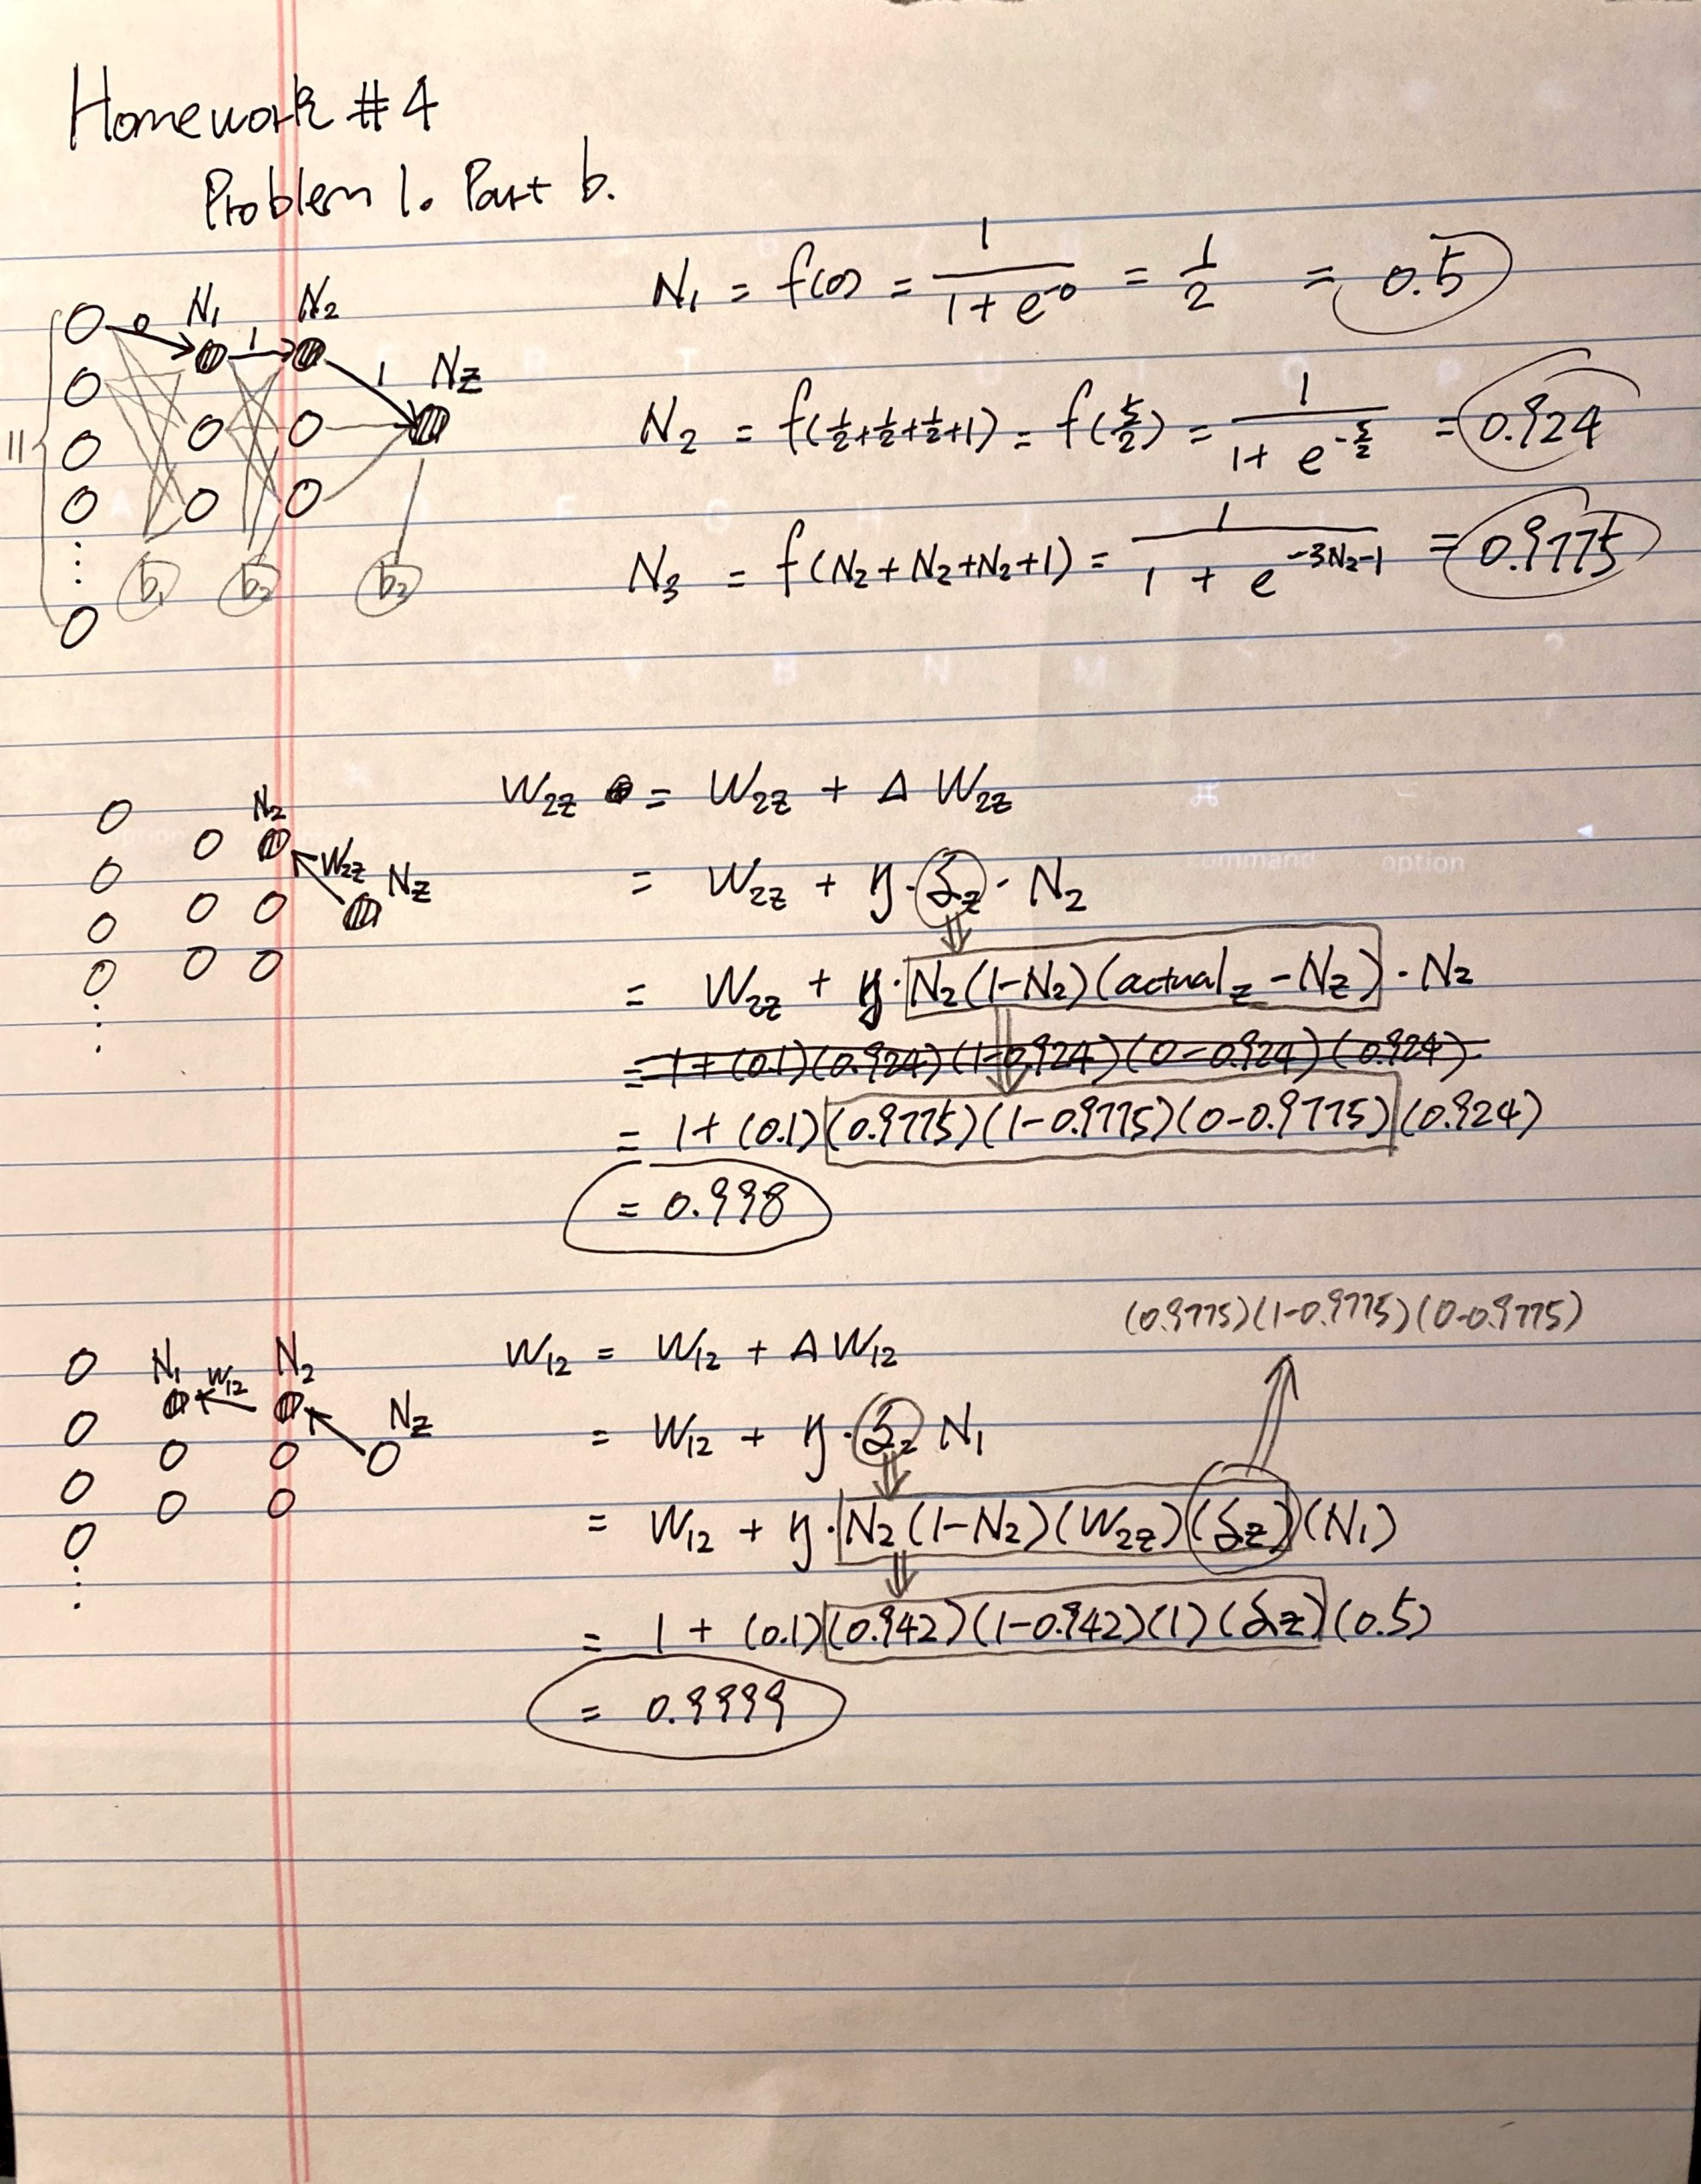

In [297]:
from IPython.display import Image
Image("1b.jpeg")

## Problem 2

In [115]:
# Self-defined dummy samples

d = {'Account Length':[-0.2, 10], 
     'Int\'l Plan no': [1, 0], 
     'Int\'l Plan yes': [0, 1],
     'VMail Message': [-0.5, 20], 
     'Day Mins': [0.2, -15], 
     'Day Calls': [0.3, -4], 
     'Eve Mins': [0.5, -7], 
     'Night Mins': [-0.1, -1.5], 
     'Intl Mins': [0.1, 60], 
     'Intl Calls': [-0.5, 2], 
     'CustServ Calls': [-0.6, 100]}

df_2 = pd.DataFrame(data=d)

In [116]:
# Overlook.
df_2.head(2)

,Account Length,Int'l Plan no,Int'l Plan yes,VMail Message,Day Mins,Day Calls,Eve Mins,Night Mins,Intl Mins,Intl Calls,CustServ Calls
0,-0.2,1,0,-0.5,0.2,0.3,0.5,-0.1,0.1,-0.5,-0.6
1,10.0,0,1,20.0,-15.0,-4.0,-7.0,-1.5,60.0,2.0,100.0


In [146]:
model_2 = create_model(3, 3)
model_2.fit(x_train, y_train)

X = np.array(df_2)
pred = model_2.predict(X)

for i in range(0,2):
    if pred[i] < 0.5:
        pred[i] = 0    
    elif pred[i] >= 0.5:
        pred[i] = 1
        
print("Test with samples that is within the range of observed features, predicted value is:", int(pred[0,0]))
print("Test with samples that is outside the range of observed features, predicted value is:", int(pred[1,0]))

73/73 [==============================] - 0s 910us/step - loss: 0.4863 - accuracy: 0.1484
[1.]
Test with samples that is within the range of observed features, predicted value is: 1
Test with samples that is outside the range of observed features, predicted value is: 1


## Problem 3

In [87]:
def create_model_1(hidden_layer1, hidden_layer2):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_layer1, input_dim=x_train.shape[1], activation='sigmoid'))
    model.add(layers.Dense(hidden_layer2,  activation='sigmoid'))
    model.add(layers.Dense(1,  activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy']) 
    return model

def create_model_3(hidden_layer1, hidden_layer2):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_layer1, input_dim=x_train.shape[1], activation='relu'))
    model.add(layers.Dense(hidden_layer2,  activation='relu'))
    model.add(layers.Dense(1,  activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) 
    return model

In [35]:
# Best: 0.144885 using {'hidden_layer1': 2, 'hidden_layer2': 2}

"""
model_3 = KerasClassifier(build_fn=create_model_3)

param_grid = {'hidden_layer1':range(2,5), 'hidden_layer2':range(2,5)}
grid = GridSearchCV(estimator=model_3, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
"""

'\nmodel_3 = KerasClassifier(build_fn=create_model_3)\n\nparam_grid = {\'hidden_layer1\':range(2,5), \'hidden_layer2\':range(2,5)}\ngrid = GridSearchCV(estimator=model_3, param_grid=param_grid)\ngrid_result = grid.fit(x_train, y_train)\n\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\n'

In [38]:
model_1 = create_model_1(3, 3)
model_1.fit(x_train, y_train)

73/73 [==============================] - 0s 809us/step - loss: 0.1743 - accuracy: 0.8516


In [37]:
model_3 = create_model_1(2, 2)
model_3.fit(x_train, y_train)

73/73 [==============================] - 0s 846us/step - loss: 0.1930 - accuracy: 0.8516


array([[0.37302864],
       [0.36675456]], dtype=float32)

## Problem 4

#### Trade-off of number of hidden layers
In machine learning's neural network, there are basically two kinds of neural networks:
<br>
&emsp;&emsp;    ANN (Artificial neural networks) are simple NN with only 0 or 1 layer.
<br>
&emsp;&emsp;    DNN (Deep neural networks) which are more complex NN, usually has 2 to 8 hidden layers.
<br>
<br>
A large number of hidden layers means highly increased training time, especially during the back-propagation when the network needs to go forward and backward among layers to update parameters.
<br>
<br>
However, increasing the number of hidden layers can increase the accuracy of neural networks.
<br>
<br>
Overall, the trade-off of using a large number of hidden layers is spending more time training and updating the NN model, but have the more accurate NN model.

#### Trade-off of learning rate
The learning rate is the most important hyper-parameters used in updating neural networks' weight value. A commonly used value of learning rate is 0.1, which means 10% of the estimated weight error when each time updating the weights.
<br>
<br>
Using a large learning rate can make the NN model learn faster, but it will generate a sub-optimal final set of weights after turns of updates.
<br>
<br>
Oppositely, a smaller learning rate can cause the NN model to learn more optimal weights, or even perfect weights, but will spend significantly longer time training the NN model.
<br>
<br>
Overall, the trade-off of using a large learning rate is that it will update sub-optimal weights, but it can make the NN model learn faster.